In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('./zisha2.rda')

In [3]:
expr[,1:dim(expr)[2]] = 2^expr[,1:dim(expr)[2]] -1

In [4]:
head(expr)

,MIA3,B4GALT2,UBAP2L,CFLAR,ZKSCAN4,BLMH,SH3BGR,FXR1,ALDOC,MUS81,FBN1,CCDC87
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431804,135.5011,118.17504,147.1445,78.39502,109.54758,58.18957,82.00965,116.9139,3063.436,144.7094,45.48111,121.90937
GSM2432040,137.7626,192.02073,139.5978,65.92812,62.22857,58.77037,78.41682,151.7935,2336.127,148.3377,39.02041,97.24916
GSM2432045,111.8869,139.21483,117.7781,69.77772,59.49773,52.57591,89.46256,154.4507,2274.847,147.5675,33.16293,90.18127
GSM2431943,139.0435,136.64555,131.7707,86.05817,68.68514,67.49717,78.54785,187.0774,2166.667,111.5871,38.14853,93.71547
GSM2431991,155.2981,98.85337,167.8292,89.46790,70.72760,54.11258,72.88659,175.1506,2337.478,108.6017,44.88485,126.97924
GSM2432005,131.2310,151.18242,144.6274,62.63578,63.85380,55.88630,88.04841,151.0876,2090.439,158.6319,36.48239,97.73587


In [5]:
type = ifelse(type == 'MDD',1,0)

In [6]:
y = type

In [7]:
colnames(expr) = gsub('-','.',colnames(expr))

In [8]:
expr <- expr[, !grepl("^\\d+", names(expr))]

In [9]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [10]:
x = as.matrix(expr)
y = y

In [11]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




png 
  2

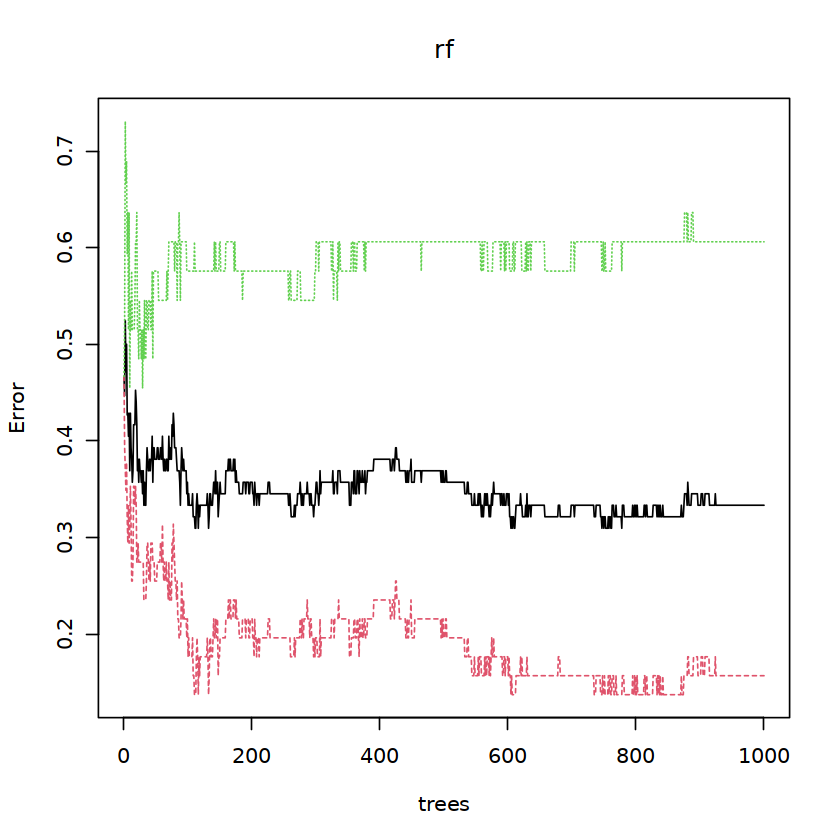

In [12]:
set.seed(111)

rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

plot(rf)

pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

MUS81     FXR1   UBAP2L   SH3BGR  ZKSCAN4   CCDC87     FBN1  B4GALT2 
4.428508 4.170901 3.833130 3.704453 3.627912 3.372241 3.141324 3.063771 
   CFLAR    ALDOC     BLMH     MIA3 
2.956226 2.761368 2.328800 2.016340

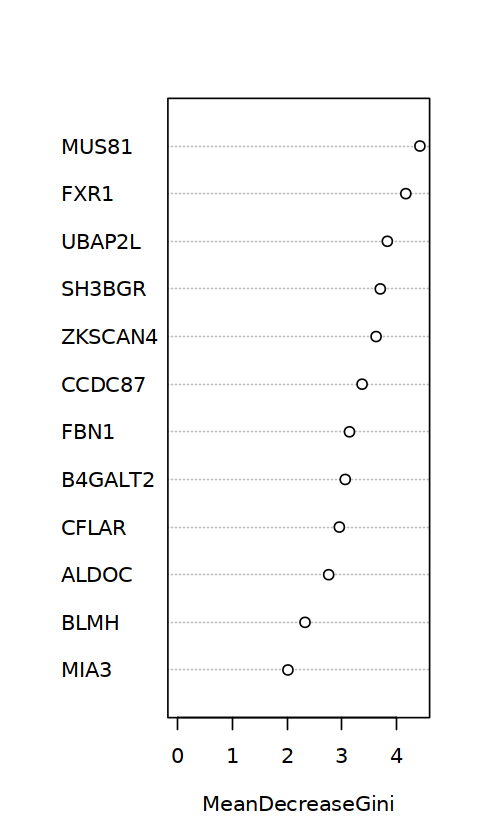

In [13]:


trees = which.min(rf$err.rate[,1])

rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

importance = importance(rf)

pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

# RPE65 + MC3R+NFIL3 + PRF1 + IL6

options(repr.plot.width = 4)

varImpPlot(rf,main = '')

rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

rfGenes

In [14]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# # expr2 = exp4

# # sigExp=expr2[rfGenes,]
# # write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# # rfGenes

### svm

In [15]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[77] 1 1 1 1 1 1 1 1

Boruta performed 196 iterations in 9.294068 secs.
 5 attributes confirmed important: CCDC87, FXR1, MUS81, SH3BGR, UBAP2L;
 7 attributes confirmed unimportant: ALDOC, B4GALT2, BLMH, CFLAR, FBN1
and 2 more;


Tentative Confirmed  Rejected 
        0         5         7 

MIA3   B4GALT2    UBAP2L     CFLAR   ZKSCAN4      BLMH    SH3BGR      FXR1 
 Rejected  Rejected Confirmed  Rejected  Rejected  Rejected Confirmed Confirmed 
    ALDOC     MUS81      FBN1    CCDC87 
 Rejected Confirmed  Rejected Confirmed 
Levels: Tentative Confirmed Rejected

Boruta performed 196 iterations in 9.294068 secs.
 5 attributes confirmed important: CCDC87, FXR1, MUS81, SH3BGR, UBAP2L;
 7 attributes confirmed unimportant: ALDOC, B4GALT2, BLMH, CFLAR, FBN1
and 2 more;

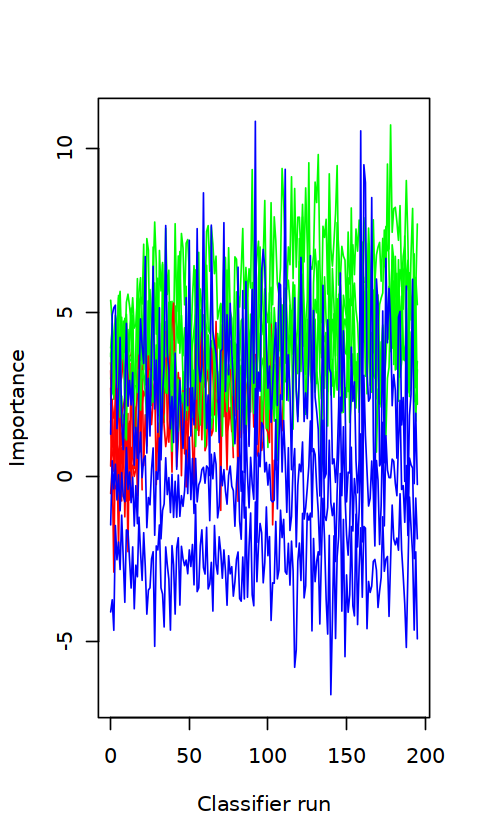

In [16]:
library(Boruta)

y

set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

boruta

table(boruta$finalDecision)

boruta$finalDecision

Boruta::plotImpHistory(boruta)

library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


boruta

# library(YSX)

# sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
#            legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
#            xtics_angle = 90)

# expr = cbind(Type,expr)

# colnames(expr)[1]  ='Group'

# expr3 = expr

# set.seed(147)  
# index <-  which( (1:nrow(expr3))%%3 == 0 )
# train <- expr3[-index,]
# test <- expr3[index,]

# table(test$Group)

# library("xgboost")
# library("Matrix")
# train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
# test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
# all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)



# train_label <- as.numeric(train$Group == 'MDD')
# test_label <-  as.numeric(test$Group == 'MDD')
# all_label <-  as.numeric(expr3$Group == 'MDD')

# all_label

# train_fin <- list(data=train_matrix,label=train_label) 
# test_fin <- list(data=test_matrix,label=test_label) 
# all_fin <- list(data=all_matrix,label=all_label) 

# dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
# dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
# dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

# xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
#   objective='binary:logistic', nround=25)

# xgb

# importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
# head(importance)
# xgb.ggplot.importance(importance)

# xgb.plot.importance(importance)

In [17]:
# lasso

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.3"
Loaded glmnet 4.1-8



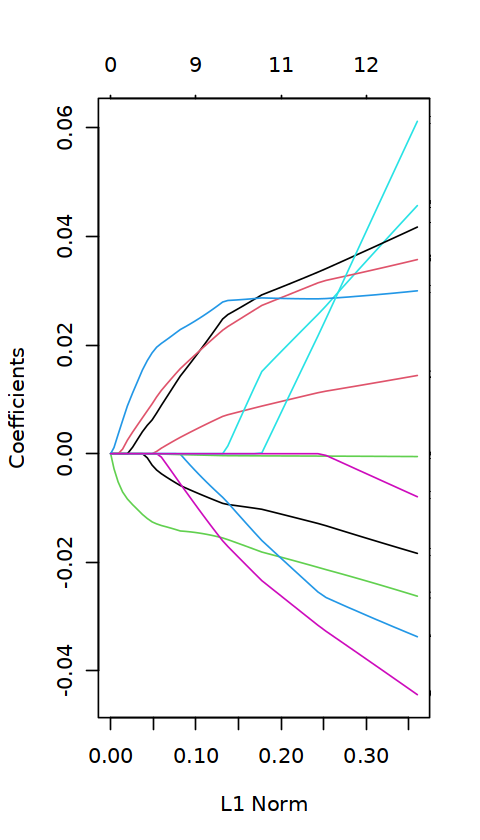

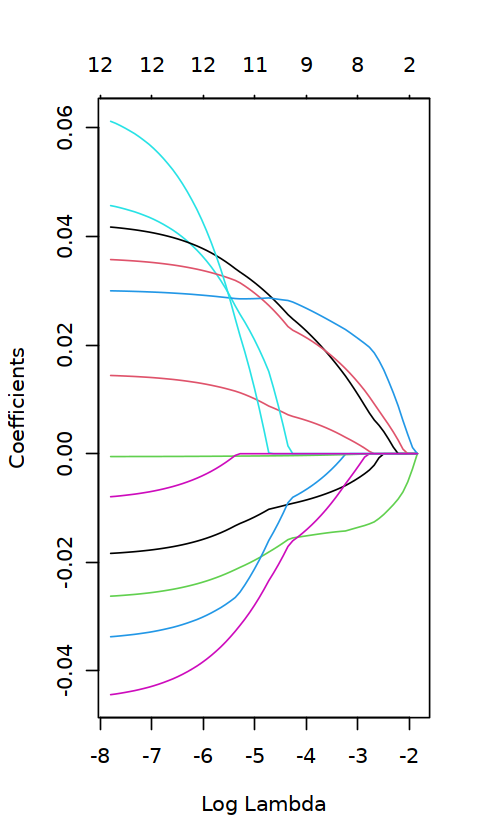

[1] 0.02701641 0.10906571

[1] "UBAP2L" "FXR1"   "MUS81"

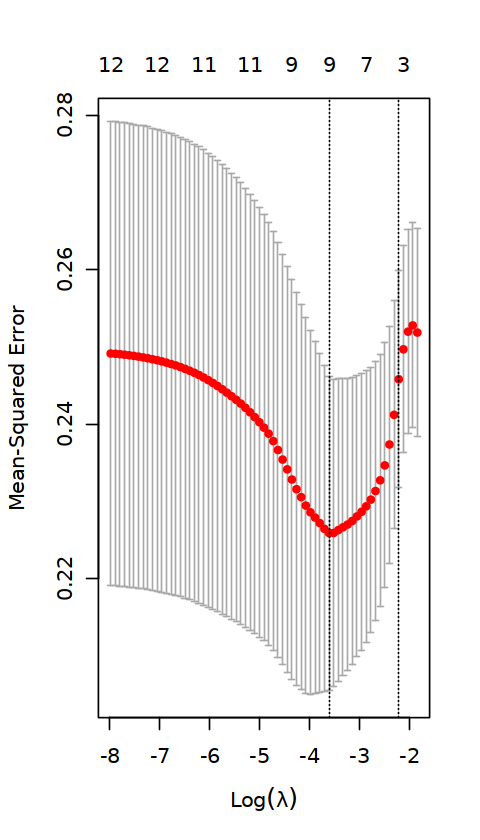

In [18]:
library(lars) 
library(glmnet) 

#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

plot(model_lasso, xvar="lambda", label=TRUE)

cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.1se	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

gene_1se

# ### 韦恩图

# importance$Feature

# RF.gene = names(rfGenes)[1:10]
# #SVF.RFE.gene = featureGenes
# XGBoost.gene = importance$Feature[1:10]

# boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

# Boruta.gene = as.vector(boruta.variable.imp2$Variable)

# lasso.gene  = gene_1se

# list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

# data =  as.data.frame (do.call (cbind, list1))


# library(venn)
#         library(VennDiagram)
#         color=c( "#3C5488B2","#00A087B2", 
#              "#F39B7FB2","#91D1C2B2", 
#              "#8491B4B2", "#DC0000B2", 
#              "#7E6148B2","yellow", 
#              "darkolivegreen1", "lightskyblue", 
#              "darkgreen", "deeppink", "khaki2", 
#              "firebrick", "brown1", "darkorange1", 
#              "cyan1", "royalblue4", "darksalmon", 
#              "darkgoldenrod1", "darkseagreen", "darkorchid")

#     if (ncol(data) == 2){
#         sample_list <- list(c1 = data[,1], c2 = data[,2])
#     }else if(ncol(data) == 3){
#         sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
#     }else if(ncol(data) == 4){
#         sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
#     }else{
#         sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
#     }
    
#     q <- venn.diagram(sample_list,filename = NULL,
#              fill = color[1:(length(sample_list))],
#              alpha = 0.50, cat.col = rep('black', ncol(data)), 
#              col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
#                              )
#     pdf(paste0('./',"venn.pdf"))
#     grid.draw(q)
#     dev.off()

# grid.draw(q)

# intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

# model.gene = intersect(lasso.gene,XGBoost.gene)



# model.gene  =lasso.gene

# model.gene

In [19]:
set.seed(1234)

In [20]:
expr3 = cbind(y,x) %>%  as.data.frame()

In [21]:
colnames(expr3)[1] = 'Group'

In [22]:
expr4 = expr3 

In [23]:
dim(expr4)

[1] 84 13

In [24]:
model.gene = colnames(expr4)[2:dim(expr4)[2]]

In [25]:
head(expr4,7)

,Group,MIA3,B4GALT2,UBAP2L,CFLAR,ZKSCAN4,BLMH,SH3BGR,FXR1,ALDOC,MUS81,FBN1,CCDC87
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431804,0,135.5011,118.17504,147.14446,78.39502,109.54758,58.18957,82.00965,116.9139,3063.436,144.7094,45.48111,121.90937
GSM2432040,0,137.7626,192.02073,139.59779,65.92812,62.22857,58.77037,78.41682,151.7935,2336.127,148.3377,39.02041,97.24916
GSM2432045,0,111.8869,139.21483,117.77811,69.77772,59.49773,52.57591,89.46256,154.4507,2274.847,147.5675,33.16293,90.18127
GSM2431943,0,139.0435,136.64555,131.77068,86.05817,68.68514,67.49717,78.54785,187.0774,2166.667,111.5871,38.14853,93.71547
GSM2431991,0,155.2981,98.85337,167.82917,89.46790,70.72760,54.11258,72.88659,175.1506,2337.478,108.6017,44.88485,126.97924
GSM2432005,0,131.2310,151.18242,144.62737,62.63578,63.85380,55.88630,88.04841,151.0876,2090.439,158.6319,36.48239,97.73587
GSM2432041,0,125.3089,129.68665,78.50828,67.39740,61.02598,57.98543,83.98534,150.1848,2104.755,133.6004,34.24030,95.48223


In [26]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


[1] "B4GALT2 0.626262626262626"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 85 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SH3BGR 0.679738562091503"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 85 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "FXR1 0.638146167557932"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 85 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "MUS81 0.681521093285799"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 85 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [27]:
a

[1] "B4GALT2" "SH3BGR"  "FXR1"    "MUS81"

In [28]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [29]:
Boruta.gene

[1] "CCDC87" "FXR1"   "MUS81"  "SH3BGR" "UBAP2L"

In [30]:
b = intersect(a,gene_1se)

In [31]:
b

[1] "FXR1"  "MUS81"

In [32]:
expr4 = expr4[,c('Group',Boruta.gene)]

In [55]:
#expr4 = expr4

In [56]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: foreign

Warning message:
"package 'foreign' was built under R version 4.2.3"
Loading requi

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CCDC87,-1.374144,0.7231021,-1.900346,0.057387725,0.25305606,0.056080600,0.9970666,CCDC87
FXR1,1.989781,0.8770889,2.268620,0.023291461,7.31393387,1.382409901,44.3398583,FXR1
MUS81,3.673328,1.3126160,2.798479,0.005134392,39.38276113,3.430226381,615.0417431,MUS81
SH3BGR,3.394883,1.3424571,2.528858,0.011443431,29.81117862,2.414986331,491.0257634,SH3BGR
UBAP2L,-3.128505,1.1693615,-2.675396,0.007464096,0.04378319,0.003664339,0.3770622,UBAP2L


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
FXR1,1.989781,0.023291461,7.31393387,1.382409901,44.3398583,FXR1
MUS81,3.673328,0.005134392,39.38276113,3.430226381,615.0417431,MUS81
SH3BGR,3.394883,0.011443431,29.81117862,2.414986331,491.0257634,SH3BGR
UBAP2L,-3.128505,0.007464096,0.04378319,0.003664339,0.3770622,UBAP2L


[1] "FXR1"   "MUS81"  "SH3BGR" "UBAP2L"

In [57]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1829  -0.8437  -0.3780   0.9432   1.7983  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -50.216     21.874  -2.296  0.02169 * 
FXR1           2.719      1.164   2.336  0.01951 * 
MUS81          5.071      1.680   3.018  0.00255 **
SH3BGR         1.315      1.500   0.877  0.38042   
UBAP2L        -2.145      1.335  -1.607  0.10802   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 112.562  on 83  degrees of freedom
Residual deviance:  87.165  on 79  degrees of freedom
AIC: 97.165

Number of Fisher Scoring iterations: 4


Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-50.216,5.270,0(0~0),0.022
FXR1,2.719,5.455,15.163(1.745~176.26),0.020
MUS81,5.071,9.107,159.319(7.312~5663.658),0.003
SH3BGR,1.315,0.769,3.726(0.19~74.541),0.380
UBAP2L,-2.145,2.583,0.117(0.007~1.552),0.108


In [58]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1829  -0.8437  -0.3780   0.9432   1.7983  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -50.216     21.874  -2.296  0.02169 * 
FXR1           2.719      1.164   2.336  0.01951 * 
MUS81          5.071      1.680   3.018  0.00255 **
SH3BGR         1.315      1.500   0.877  0.38042   
UBAP2L        -2.145      1.335  -1.607  0.10802   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 112.562  on 83  degrees of freedom
Residual deviance:  87.165  on 79  degrees of freedom
AIC: 97.165

Number of Fisher Scoring iterations: 4


In [59]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=97.16
Group ~ FXR1 + MUS81 + SH3BGR + UBAP2L

         Df Deviance     AIC
- SH3BGR  1   87.931  95.931
<none>        87.165  97.165
- UBAP2L  1   89.818  97.818
- FXR1    1   93.369 101.369
- MUS81   1   98.348 106.348

Step:  AIC=95.93
Group ~ FXR1 + MUS81 + UBAP2L

         Df Deviance     AIC
<none>        87.931  95.931
+ SH3BGR  1   87.165  97.165
- UBAP2L  1   91.765  97.765
- FXR1    1   95.151 101.151
- MUS81   1  101.318 107.318



Call:
glm(formula = Group ~ FXR1 + MUS81 + UBAP2L, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1648  -0.8704  -0.3916   0.9405   1.7444  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -42.604     19.824  -2.149   0.0316 * 
FXR1           2.862      1.146   2.497   0.0125 * 
MUS81          5.327      1.645   3.239   0.0012 **
UBAP2L        -2.444      1.282  -1.906   0.0566 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 112.562  on 83  degrees of freedom
Residual deviance:  87.931  on 80  degrees of freedom
AIC: 95.931

Number of Fisher Scoring iterations: 4


In [197]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-22.412,16.749,0(0~0),<0.001
MUS81,0.047,7.531,1.048(1.016~1.087),0.006
UCK2,0.053,2.040,1.054(0.986~1.14),0.153
CNIH3,0.086,8.427,1.09(1.034~1.164),0.004
OTUD4,0.240,5.849,1.272(1.062~1.587),0.016


In [198]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [199]:
#save(b,file = 'b.rda')

In [200]:
data = data[,c('Group',b)]

In [201]:
library(autoReg)

In [202]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=51),1 (N=33),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MUS81,Mean <U+00B1> SD,147.0 <U+00B1> 21.6,160.1 <U+00B1> 17.3,MUS81,"1.03 (1.01-1.06, p=.006)","1.05 (1.01-1.08, p=.006)"
UCK2,Mean <U+00B1> SD,61.5 <U+00B1> 8.2,66.9 <U+00B1> 11.7,UCK2,"1.06 (1.01-1.12, p=.024)","1.05 (0.98-1.13, p=.153)"
CNIH3,Mean <U+00B1> SD,40.3 <U+00B1> 9.6,47.2 <U+00B1> 14.2,CNIH3,"1.05 (1.01-1.10, p=.014)","1.09 (1.03-1.16, p=.004)"
OTUD4,Mean <U+00B1> SD,31.3 <U+00B1> 3.1,32.7 <U+00B1> 2.7,OTUD4,"1.18 (1.01-1.38, p=.042)","1.27 (1.05-1.55, p=.016)"


In [203]:
library(caret)

In [33]:
data = expr4

In [34]:
set.seed(141)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=5)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.8081792

In [35]:
auc_value

[1] 0.8250000 0.7917448 0.7861111 0.8013566 0.8428571 0.7847619 0.8133208
 [8] 0.7750000 0.8351852 0.8264540

In [36]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 5


Setting levels: control = 0, case = 1

Setting direction: controls > cases



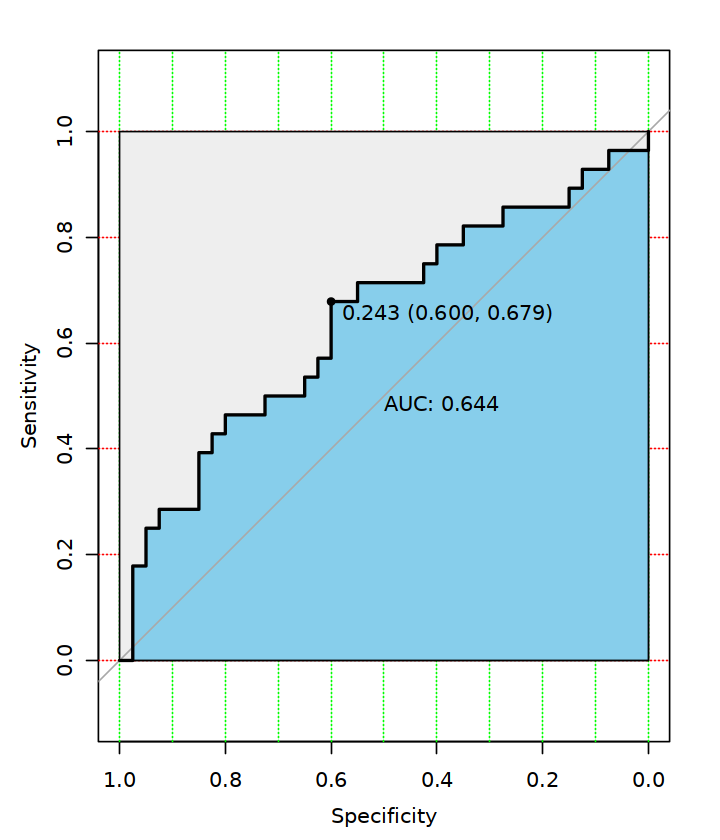

In [37]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [211]:
saveRDS(data,file = 'model.sample.rds')